# 3 Exploratory Data Analysis

### 3.1 Importing Libraries and Data

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings("ignore")

In [36]:
filename = '../Step 2 - Data Wrangling/predict-volcanic-eruptions/Data.csv'
df = pd.read_csv(filename)

df.head()

segment_id  sensor_1_mean  sensor_1_01percentile  sensor_1_05percentile  \
0  1000015382       0.382244                 -277.0                 -174.0   
1  1000554676      -3.828120                -1252.0                 -878.0   
2  1000745424       8.291928                -1392.0                 -989.0   
3  1001461087       2.071582                -1017.0                 -645.0   
4  1001732002       0.904102                 -702.0                 -465.0   

   sensor_1_10percentile  sensor_1_20percentile  sensor_1_25percentile  \
0                 -130.0                  -83.0                  -66.0   
1                 -686.0                 -446.0                 -356.0   
2                 -765.0                 -497.0                 -400.0   
3                 -485.0                 -310.0                 -246.0   
4                 -358.0                 -233.0                 -187.0   

   sensor_1_35percentile  sensor_1_45percentile  sensor_1_65percentile  ...  \
0                  -38.0                  -12.0                   37.0  ...   
1                 -206.0                  -67.0                  199.0  ...   
2                 -230.0                  -74.0                  234.0  ...   
3                 -141.0                  -46.0                  140.0  ...   
4                 -104.0                  -33.0                  105.0  ...   

   sensor_10_var  sensor_10_max  sensor_10_min  sensor_10_range  \
0   6.201152e+04         3179.0        -2961.0           6140.0   
1   1.112280e+06         4442.0        -4329.0           8771.0   
2   1.510302e+06         5230.0        -5040.0          10270.0   
3   5.420066e+05         5788.0        -4634.0          10422.0   
4   8.239711e+05         4574.0        -3909.0           8483.0   

   sensor_10_kurtosis  sensor_10_skew  sensor_10_sum  sensor_10_meanAbsDev  \
0           14.978788        0.058227        53806.0            163.679382   
1            0.160791        0.004739      -445008.0            835.125977   
2            0.193508       -0.025480       -89519.0            972.496460   
3            2.732420       -0.051502       -82408.0            548.506348   
4            1.135692        0.375558      1922895.0            691.087891   

   sensor_10_localExtremaCount  time_to_eruption  
0                        16748          16258654  
1                         5452           6347792  
2                         4705           5120693  
3                         9983          10393161  
4                         5633          20549733  

[5 rows x 242 columns]

## 3.2 Scaling DatascaleModel = StandardScaler()
scaleModel.fit(df)
scaledData = scaleModel.transform(df)
scaledDF = pd.DataFrame(scaledData)
scaledDF.columns = df.columns

scaledDF.head()

In [37]:
scaleModel = StandardScaler()
scaleModel.fit(df)
scaledData = scaleModel.transform(df)
scaledDF = pd.DataFrame(scaledData)
scaledDF.columns = df.columns

scaledDF.head()

segment_id  sensor_1_mean  sensor_1_01percentile  sensor_1_05percentile  \
0   -0.121207       0.050700               0.373274               0.346874   
1   -0.120332      -0.184393               0.093660               0.067894   
2   -0.120022       0.492353               0.053510               0.023908   
3   -0.118861       0.145028               0.161054               0.160227   
4   -0.118421       0.079839               0.251391               0.231557   

   sensor_1_10percentile  sensor_1_20percentile  sensor_1_25percentile  \
0               0.334557               0.334845               0.335849   
1               0.058006               0.055340               0.055175   
2               0.018712               0.016071               0.012590   
3               0.157983               0.160058               0.161638   
4               0.221152               0.219347               0.218740   

   sensor_1_35percentile  sensor_1_45percentile  sensor_1_65percentile  ...  \
0               0.334529               0.335511              -0.336552  ...   
1               0.048506               0.045034              -0.059614  ...   
2               0.007646               0.008065               0.000218  ...   
3               0.159170               0.155944              -0.160474  ...   
4               0.222163               0.224602              -0.220307  ...   

   sensor_10_var  sensor_10_max  sensor_10_min  sensor_10_range  \
0      -0.149147      -0.396287       0.439218        -0.419381   
1      -0.113164      -0.152069       0.176533        -0.164955   
2      -0.099527       0.000302       0.040006        -0.019996   
3      -0.132702       0.108199       0.117967        -0.005298   
4      -0.123041      -0.126545       0.257182        -0.192805   

   sensor_10_kurtosis  sensor_10_skew  sensor_10_sum  sensor_10_meanAbsDev  \
0            1.412547        0.482361       0.036650             -0.444575   
1           -0.279843        0.048540      -0.212055              0.013029   
2           -0.276106       -0.196551      -0.034810              0.106650   
3            0.013867       -0.407610      -0.031265             -0.182308   
4           -0.168498        3.056105       0.968564             -0.085136   

   sensor_10_localExtremaCount  time_to_eruption  
0                     1.201989         -0.488787  
1                    -0.652658         -1.223858  
2                    -0.775305         -1.314870  
3                     0.091269         -0.923820  
4                    -0.622940         -0.170526  

[5 rows x 242 columns]

### 3.3 Dimmensionality Reduction

Text(0.5, 1.0, 'Cumulative variance ratio explained by PCA components for state/resort summary statistics')

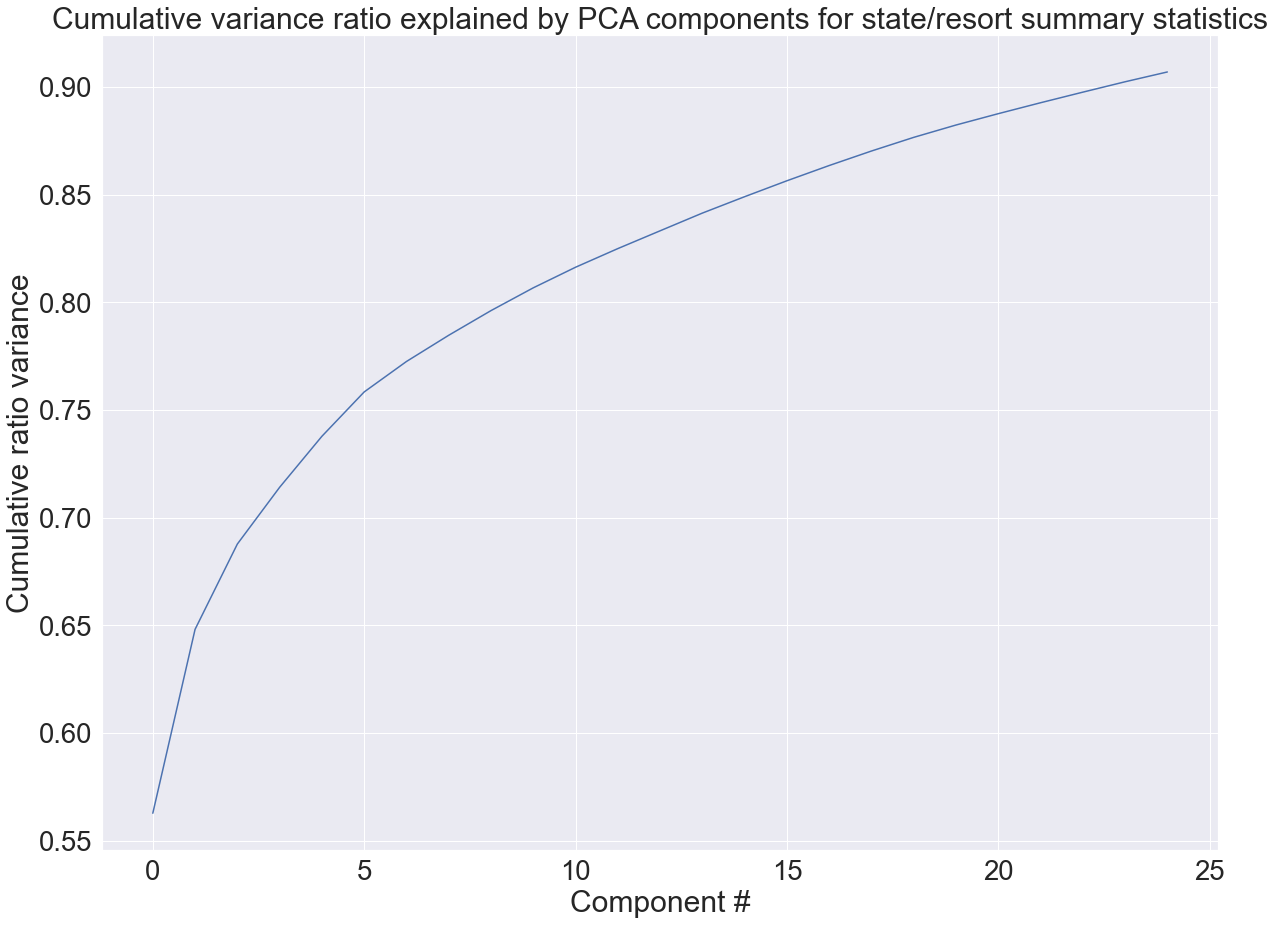

In [40]:
model = PCA(n_components = 25)
model.fit(scaledDF)

plt.subplots(figsize=(20, 15))
plt.plot(model.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics')

In [44]:
PCAData = model.transform(scaledDF)

PCADF = pd.DataFrame(PCAData,columns = [ f'Component_{i}' for i in range(1,26)])
PCADF = pd.concat([PCADF,scaledDF[['time_to_eruption']]],axis=1)
PCADF.head()

Component_1  Component_2  Component_3  Component_4  Component_5  \
0    -4.185138    -0.467841    -0.410325    -0.099169    -0.242827   
1     0.472247    -0.095808    -1.674283    -0.711074    -0.011230   
2     0.969121    -0.904861    -1.917799    -1.138233    -0.377331   
3    -1.332452     1.313246    -0.042138     0.282290     0.479007   
4    -3.092589    -0.985290    -0.720975    -0.418826     0.716925   

   Component_6  Component_7  Component_8  Component_9  Component_10  ...  \
0     0.541611    -0.147742     1.323550     0.664122      1.156840  ...   
1    -0.730457     0.783198    -0.765993    -0.572393     -1.262447  ...   
2    -1.445297     1.282553    -1.613385    -0.711061     -1.379365  ...   
3     0.155226    -0.044689    -0.257884     0.569489      0.382875  ...   
4    -0.756249    -0.403850    -0.389569    -1.162668      0.300864  ...   

   Component_17  Component_18  Component_19  Component_20  Component_21  \
0      0.207098     -1.316062     -0.374188      0.629621      0.259228   
1      1.422034     -0.485726      0.159006     -0.147022     -1.630151   
2      0.280829     -0.202500      0.313235     -0.292092     -0.929346   
3      0.293808     -0.071279      0.330527      0.256189      0.846468   
4     -1.052049      0.304567     -1.919804     -0.313495     -0.045971   

   Component_22  Component_23  Component_24  Component_25  time_to_eruption  
0     -0.631873     -0.012476      0.132993      0.671643         -0.488787  
1     -0.531519      0.406583     -0.775592     -0.465897         -1.223858  
2      0.524442     -0.131002     -0.033680      0.310136         -1.314870  
3      0.405097      1.019254     -0.069877      0.519515         -0.923820  
4     -0.583452     -0.465099     -0.480471     -0.718280         -0.170526  

[5 rows x 26 columns]

We currently have 250 features to take a look at, which makes it difficult to look at everything without creating hundreds of graphs, so I'm gonna try focusing on certain features to see if there's any relations there. The first set of features that interest me is looking to see how the local max and min counts have any affect on time to erupt.

## 3.3 Scatter Plots

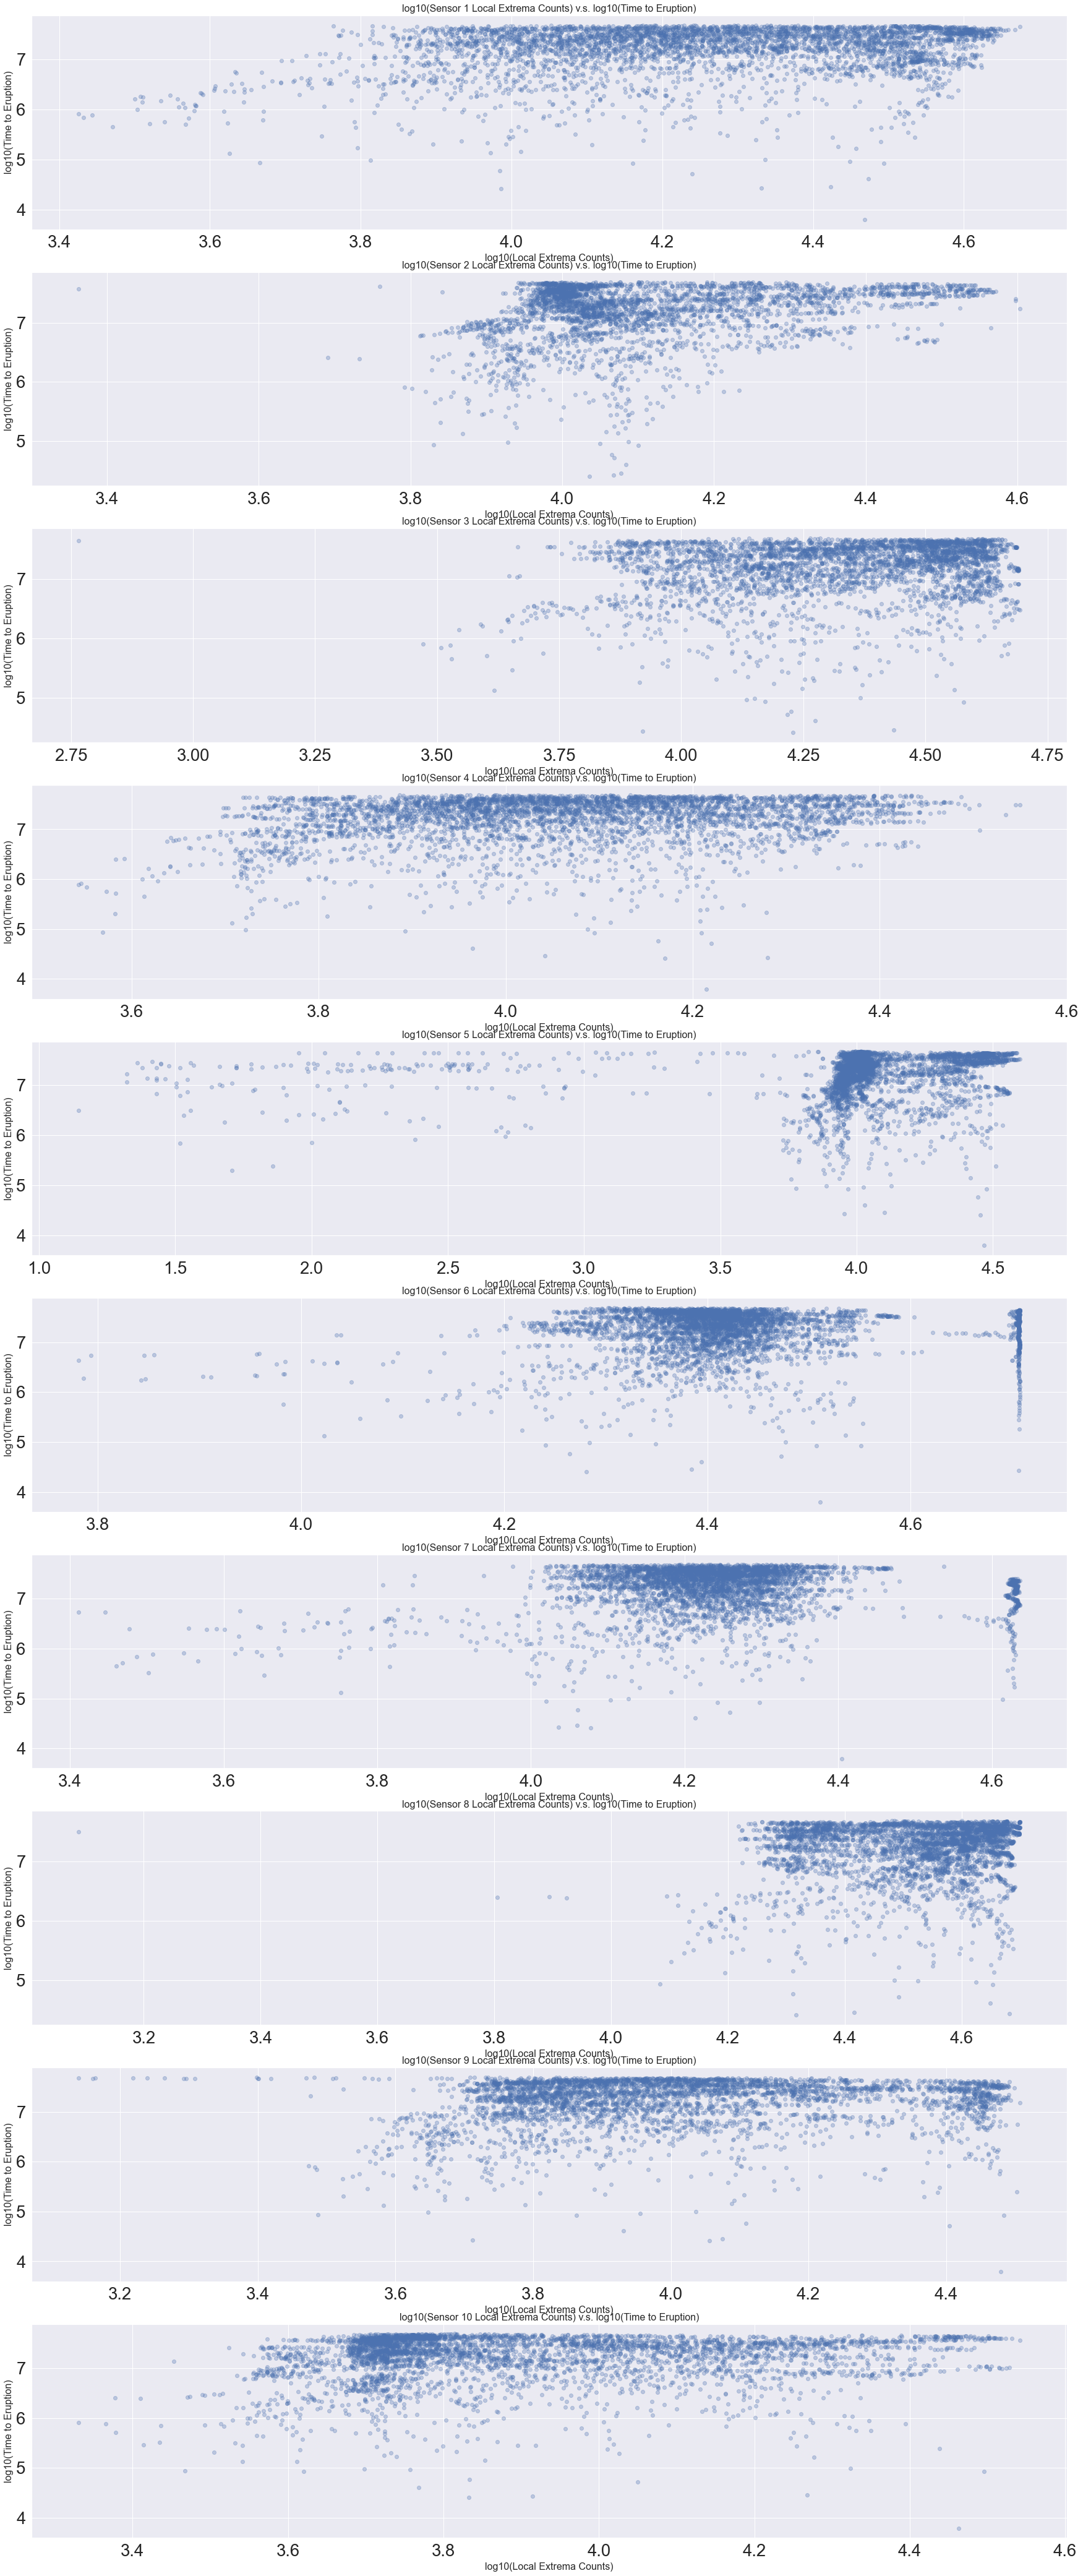

In [62]:
fig,axs = plt.subplots(10)

for i in range(10) :
    axs[i].scatter(np.log10(df[f'sensor_{i+1}_localExtremaCount']), np.log10(df['time_to_eruption']), alpha = 0.3)
    
    axs[i].set_xlabel('log10(Local Extrema Counts)', fontsize=16)
    axs[i].set_ylabel('log10(Time to Eruption)', fontsize=16)
    
    axs[i].set_title(f'log10(Sensor {i+1} Local Extrema Counts) v.s. log10(Time to Eruption)', fontsize=16)
    
fig.set_figheight(75)
fig.set_figwidth(30)

We start by looking at local extrema counts compared to our target since it was one feature I was curious to see if there was any relation with the target. Looking at some of our sensors, we can almost see a trend in some sensors but it is pretty hard to determine just by looking at it. We see a lot of points clustered on top of each other but nothing obviously sticking out. Log base 10 was applied to our data since it scales multiple orders of magnitudes, I wanted to reduce the scale to see if a better picture can be painted. Next we will take a look at our PCA data to see if anything can be observed there.

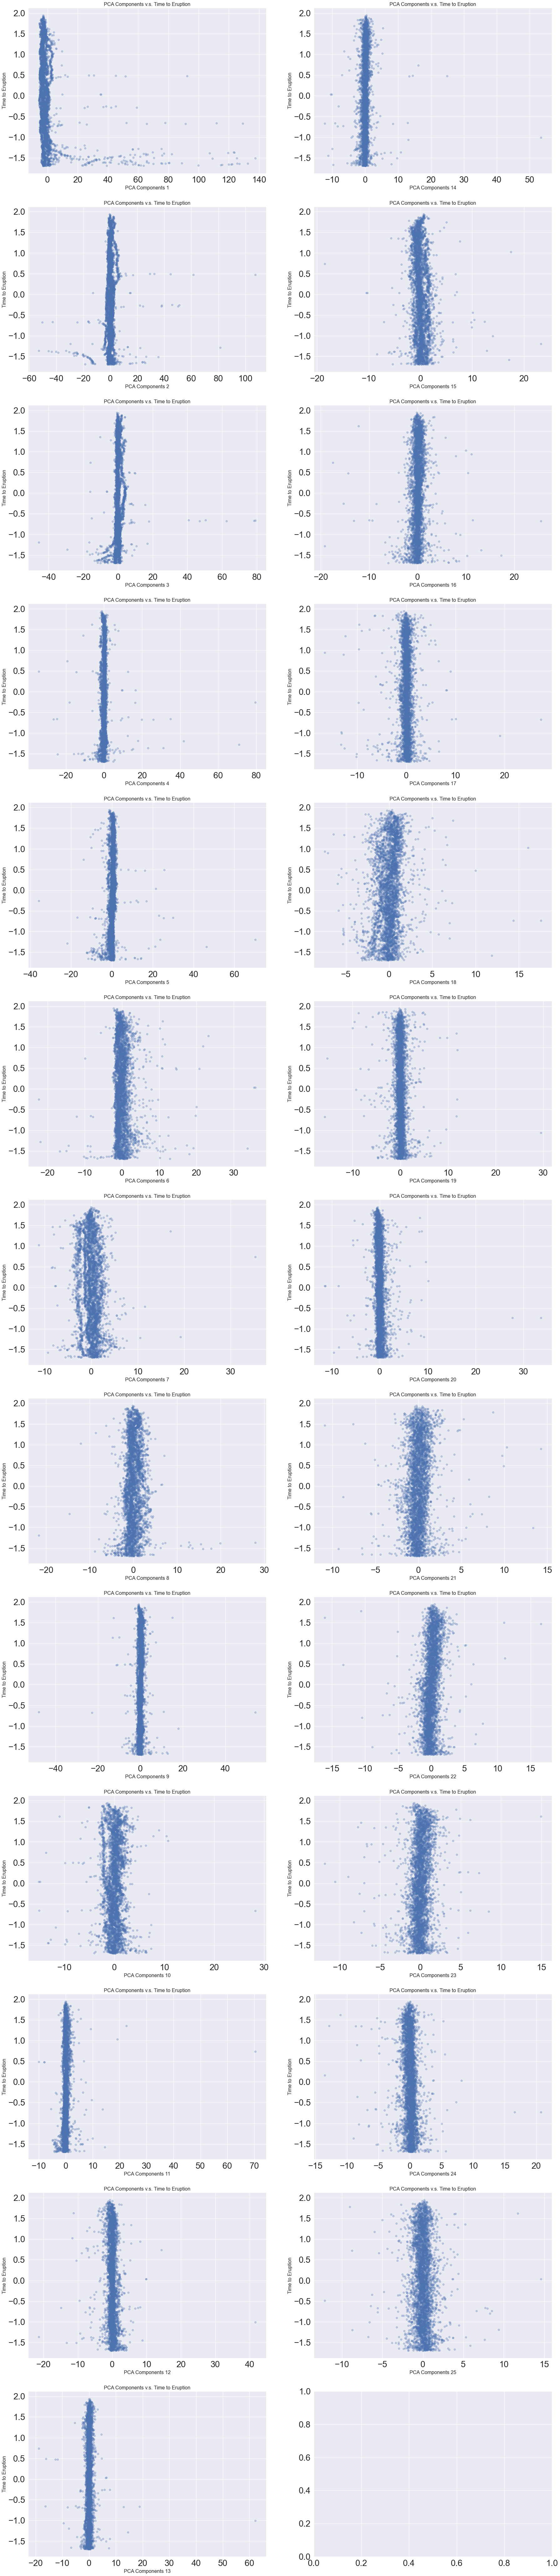

In [60]:
fig,axs = plt.subplots(13,2)

for i in range(0,25) :
    column = 0
    row = i
    if i > 12 :
        column = 1
        row = i-13
        
    axs[row][column].scatter(PCADF[[f'Component_{i+1}']],PCADF[['time_to_eruption']], alpha = 0.3)

    axs[row][column].set_xlabel(f'PCA Components {i+1}', fontsize=16)
    axs[row][column].set_ylabel('Time to Eruption', fontsize=16)

    axs[row][column].set_title('PCA Components v.s. Time to Eruption', fontsize=16)
    
fig.set_figheight(150)
fig.set_figwidth(30)

We see this pattern of most of the data being lined up around 0

## 3.4 Correlation Heat Map

<AxesSubplot:>

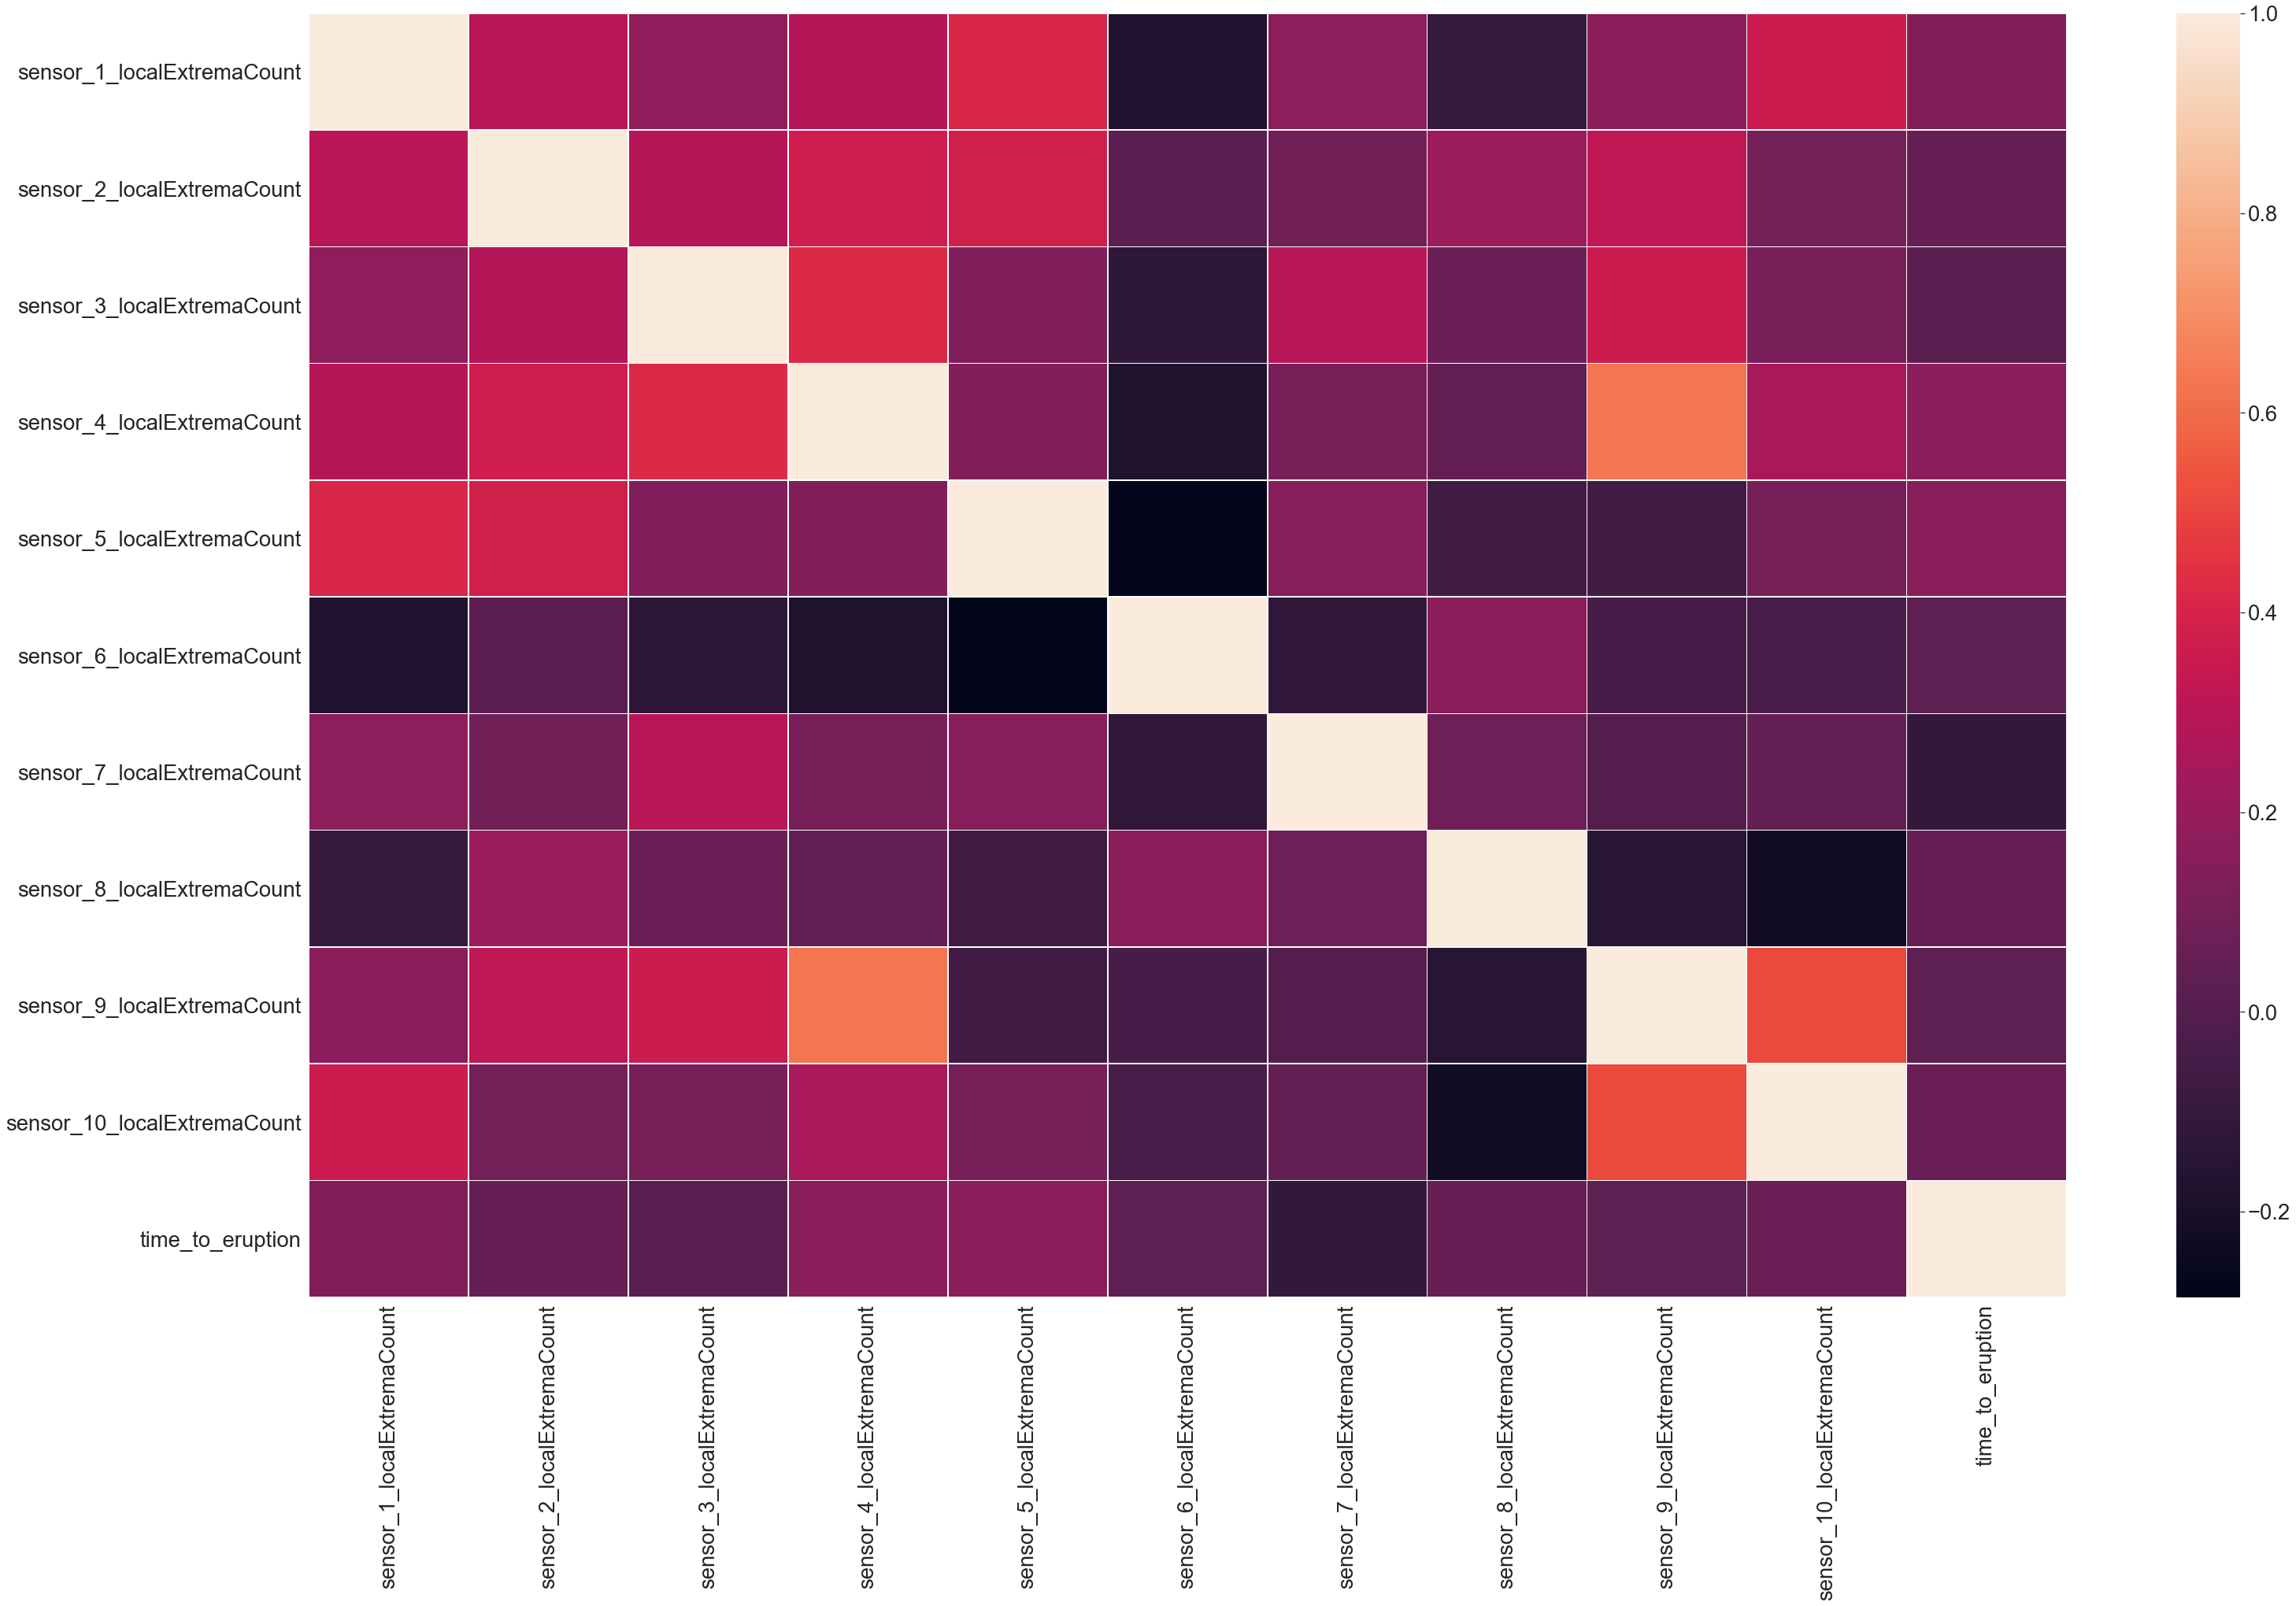

In [63]:
fig, ax = plt.subplots(figsize=(50,30)) 
sns.set(font_scale=2.5)
sns.heatmap(df[['sensor_1_localExtremaCount','sensor_2_localExtremaCount','sensor_3_localExtremaCount','sensor_4_localExtremaCount','sensor_5_localExtremaCount','sensor_6_localExtremaCount','sensor_7_localExtremaCount','sensor_8_localExtremaCount','sensor_9_localExtremaCount','sensor_10_localExtremaCount','time_to_eruption']].corr(),linewidths = 0.5,ax = ax)

Looking at the heatmap, we see some high correlations like Sensor 4 and Sensor 9 but with our target variable, nothing appears too strong. There appears to be no strong linear relationship with extrema counts and time_to_eruption.

<AxesSubplot:>

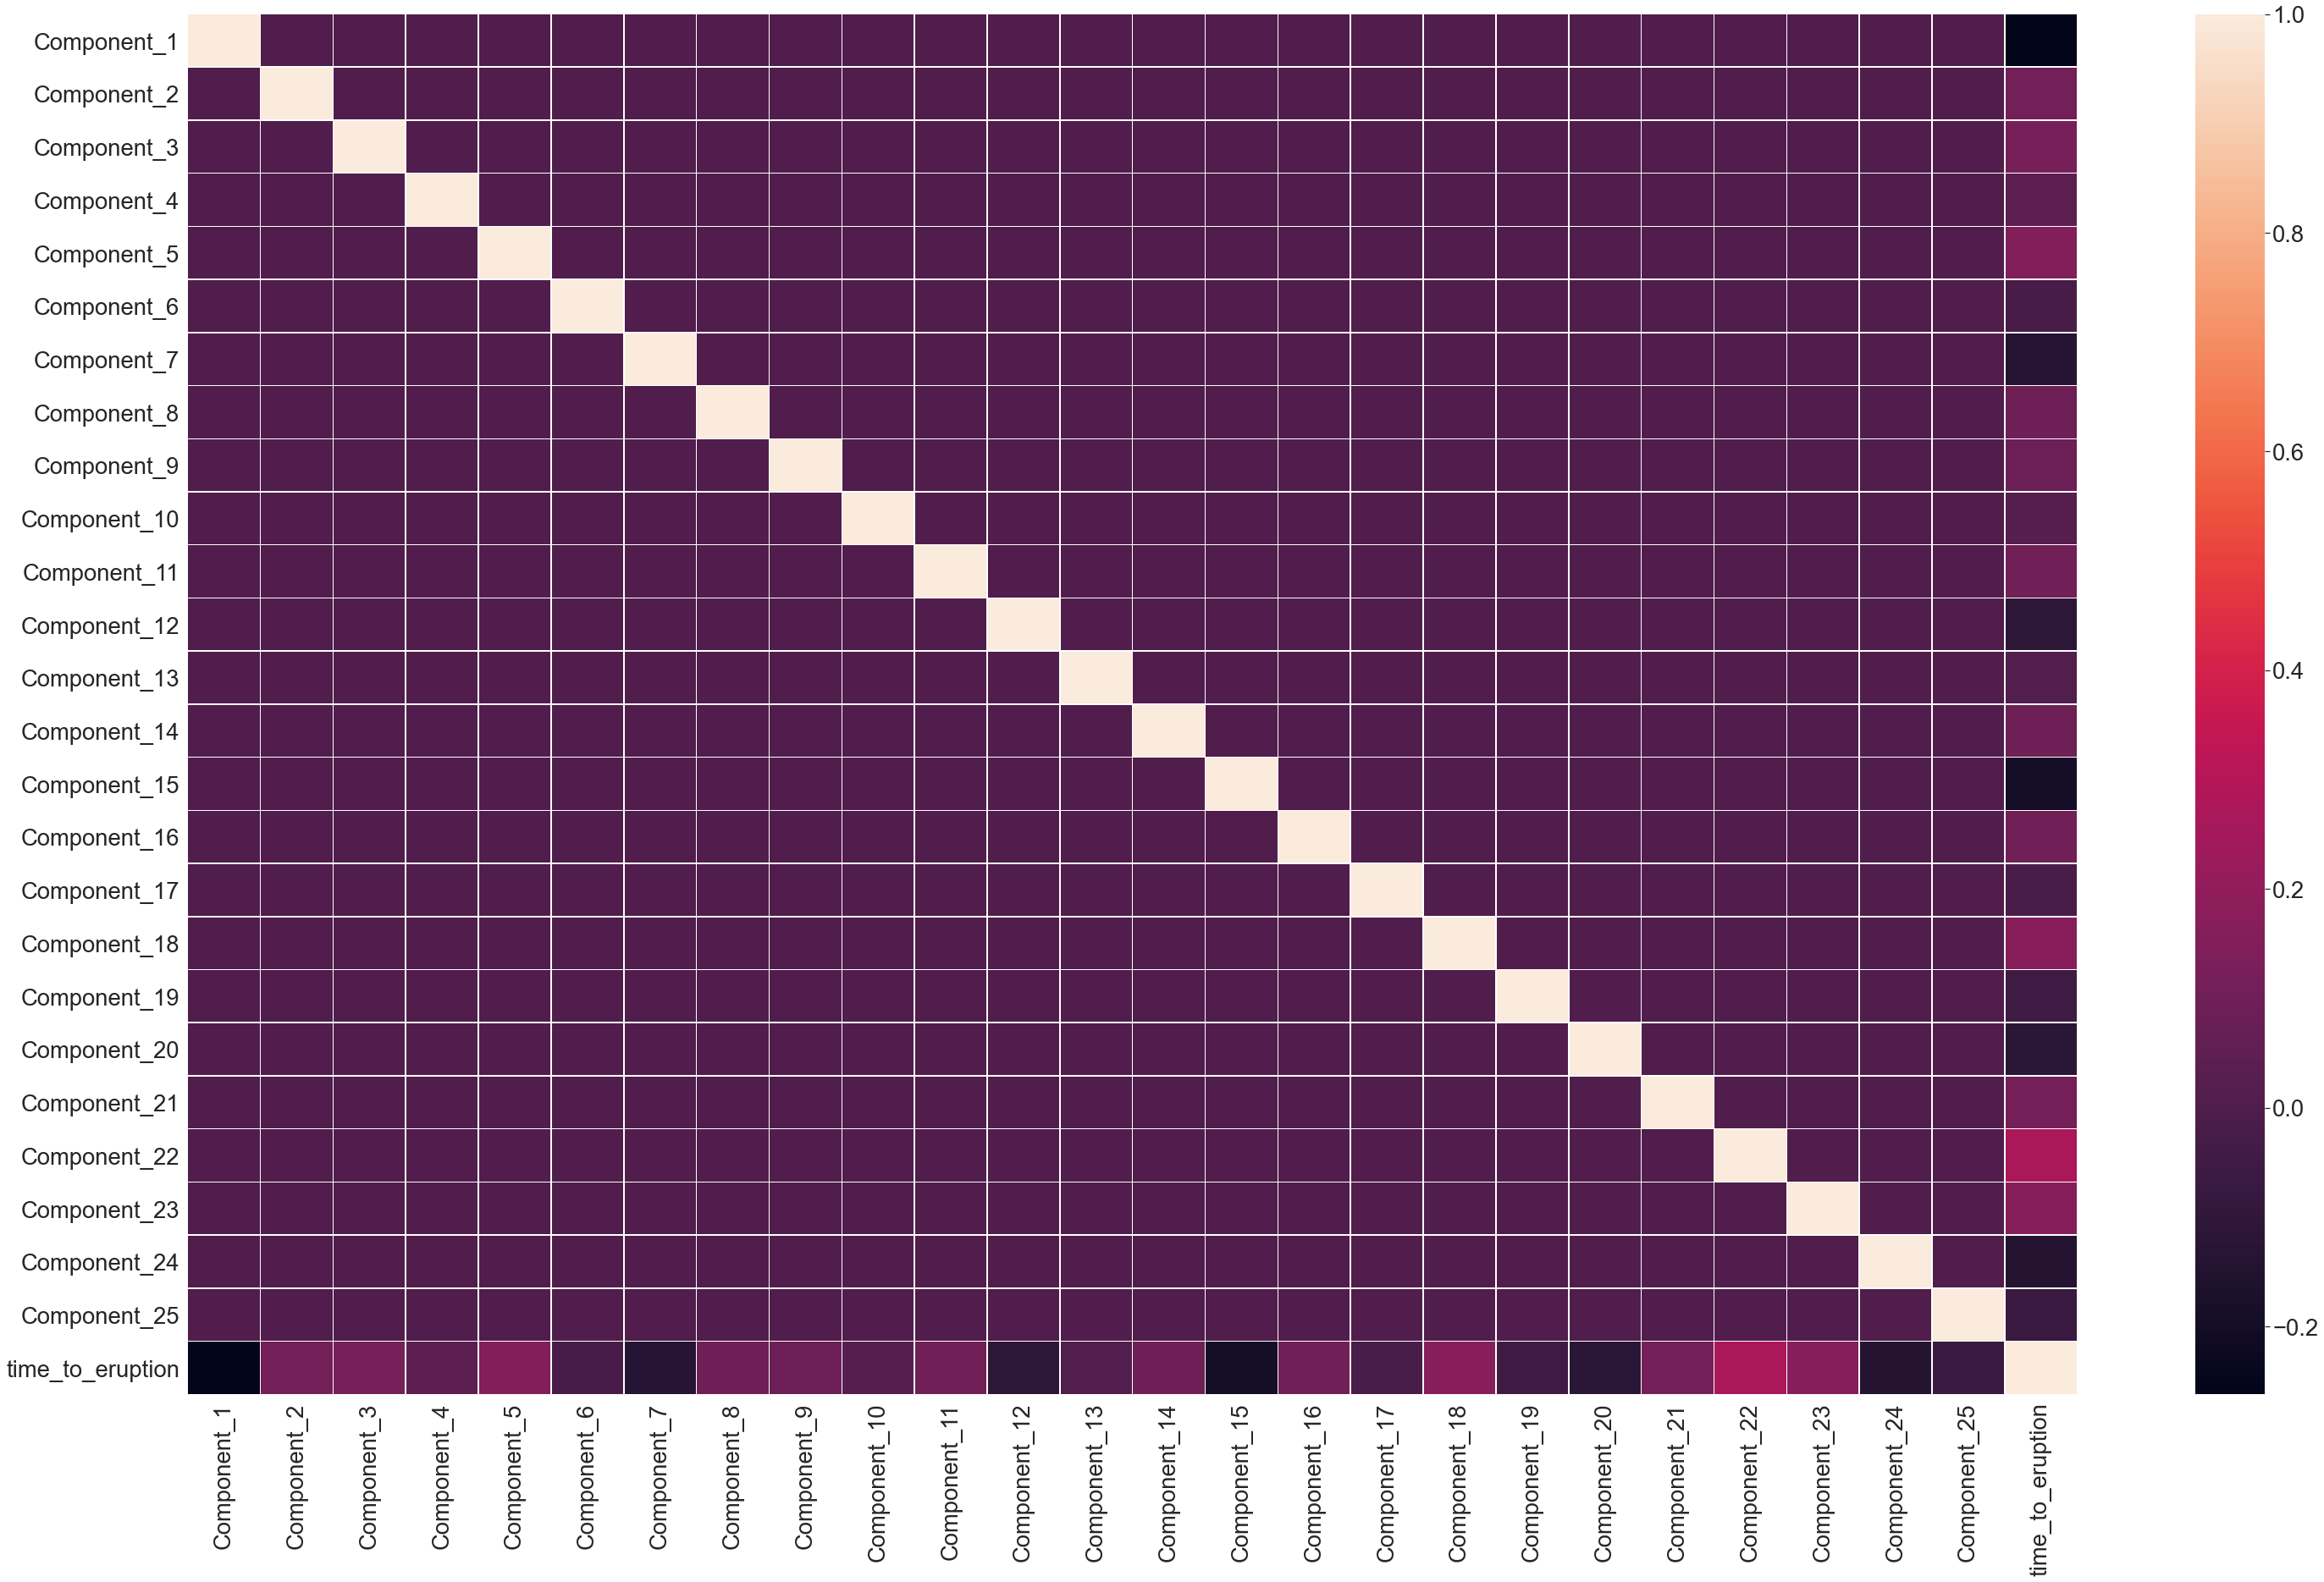

In [46]:
fig, ax = plt.subplots(figsize=(50,30)) 
sns.set(font_scale=2.5)
sns.heatmap(PCADF.corr(),linewidths = 0.5,ax = ax)

Looking at the heatmap,all components are not correlated to each other since PCA created independent components. Looking at our target variable though, we do not see anything that sticks out except for Component_22. It has the strongest linear relationship with our target variable.

## 3.6 Dimmensionality Reduction to Visualize Higher Dimmensions

In [12]:
tsne = TSNE()
tsneData = tsne.fit_transform(scaledDF)
tsneDatarot90 = np.rot90(tsneData, k=1, axes=(0, 1))

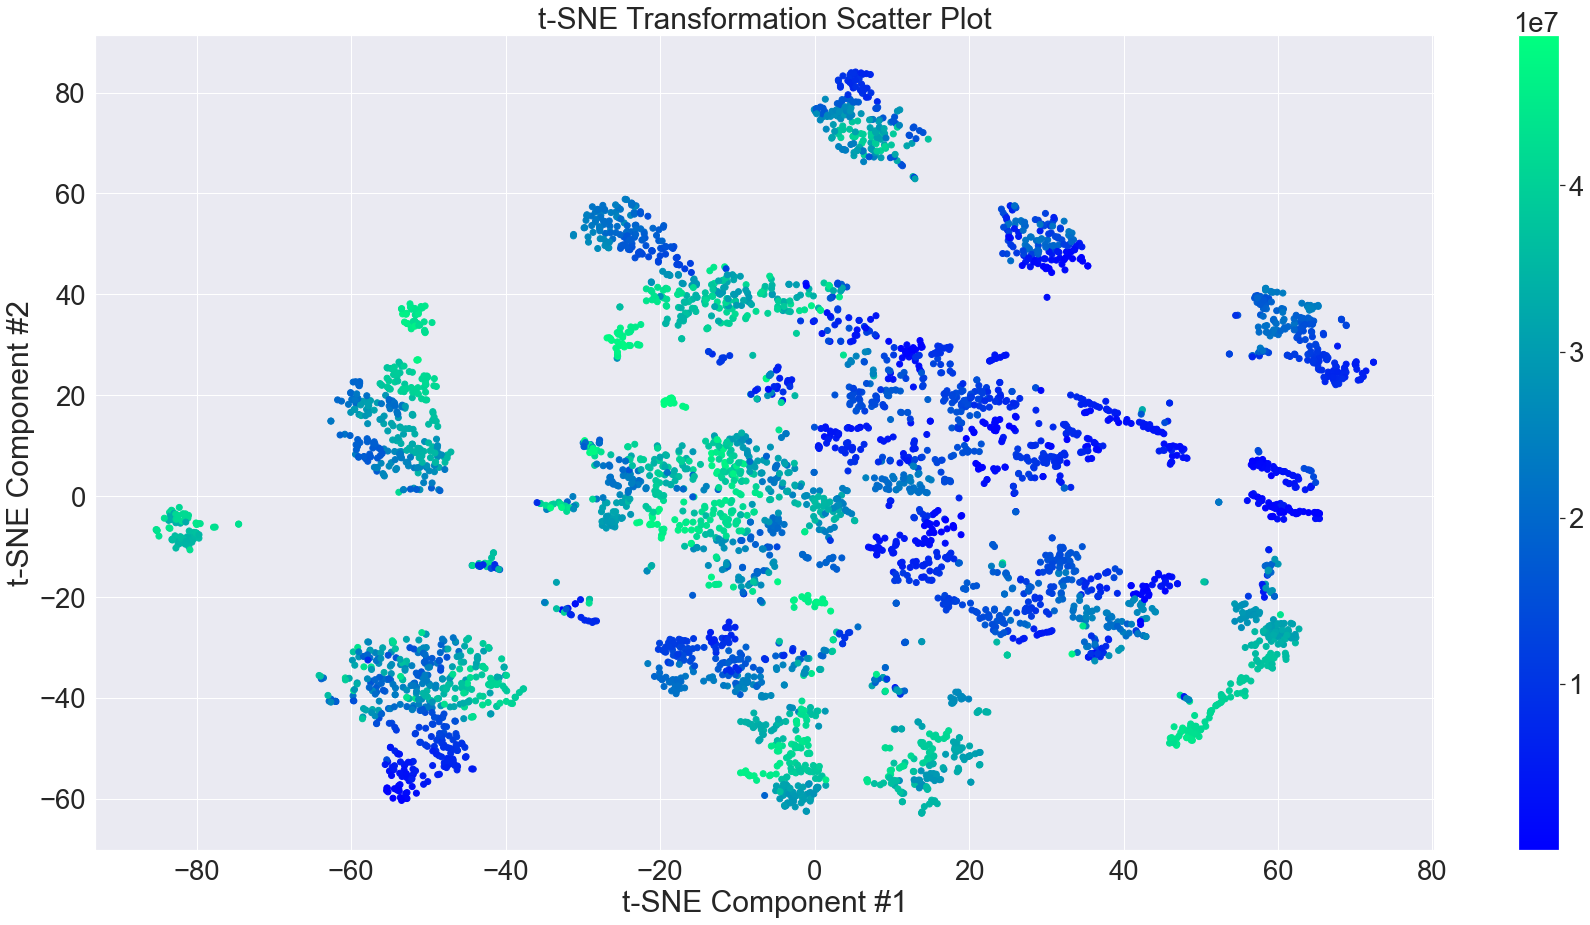

In [13]:
plt.subplots(figsize=(30,15))

plt.scatter(tsneDatarot90[0],tsneDatarot90[1],c = PCADF['time_to_eruption'], cmap = 'winter')
plt.xlabel('t-SNE Component #1')
plt.ylabel('t-SNE Component #2')
plt.title('t-SNE Transformation Scatter Plot')
plt.colorbar()


plt.show()

With t-SNE, we see a lot more noticable clusters in our data. While some clusters contain a mix of colors(values), we do have some clusters that have a pretty similar value range. Some examples being the bottom left and the middle right.

## 3.7 DBSCAN to view clustering

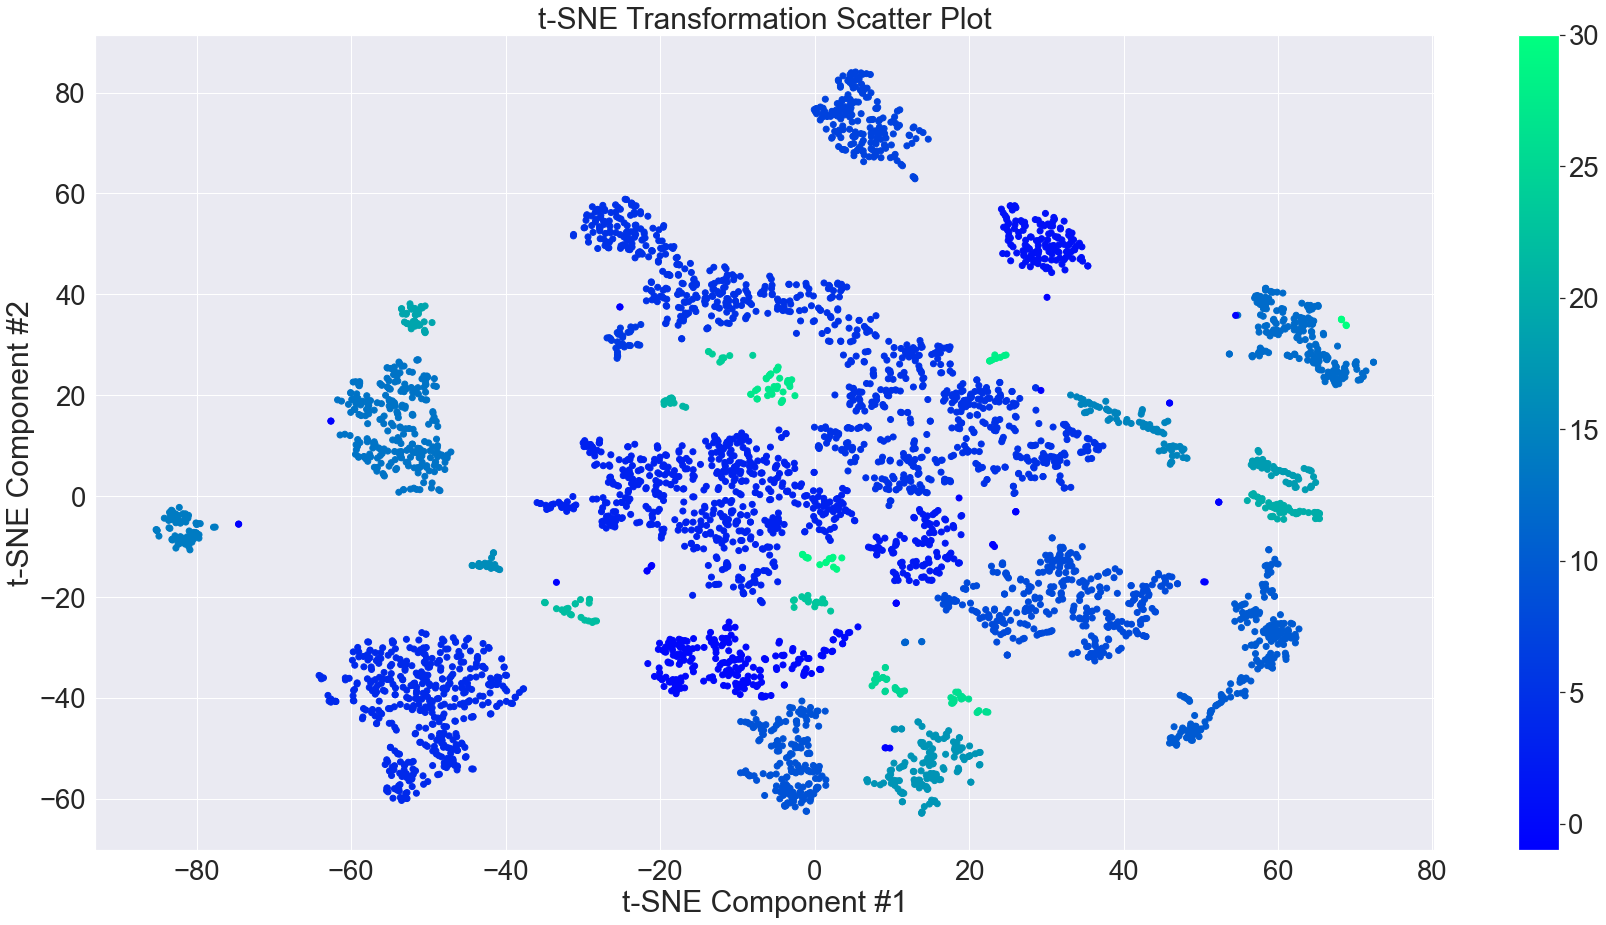

In [14]:
tsnelabels = DBSCAN(eps=3, min_samples = 5).fit_predict(tsneData)

plt.subplots(figsize=(30,15))

plt.scatter(tsneDatarot90[0],tsneDatarot90[1],c = tsnelabels , cmap = 'winter')
plt.xlabel('t-SNE Component #1')
plt.ylabel('t-SNE Component #2')
plt.title('t-SNE Transformation Scatter Plot')
plt.colorbar()

plt.show()--

## 3.8 Histograms

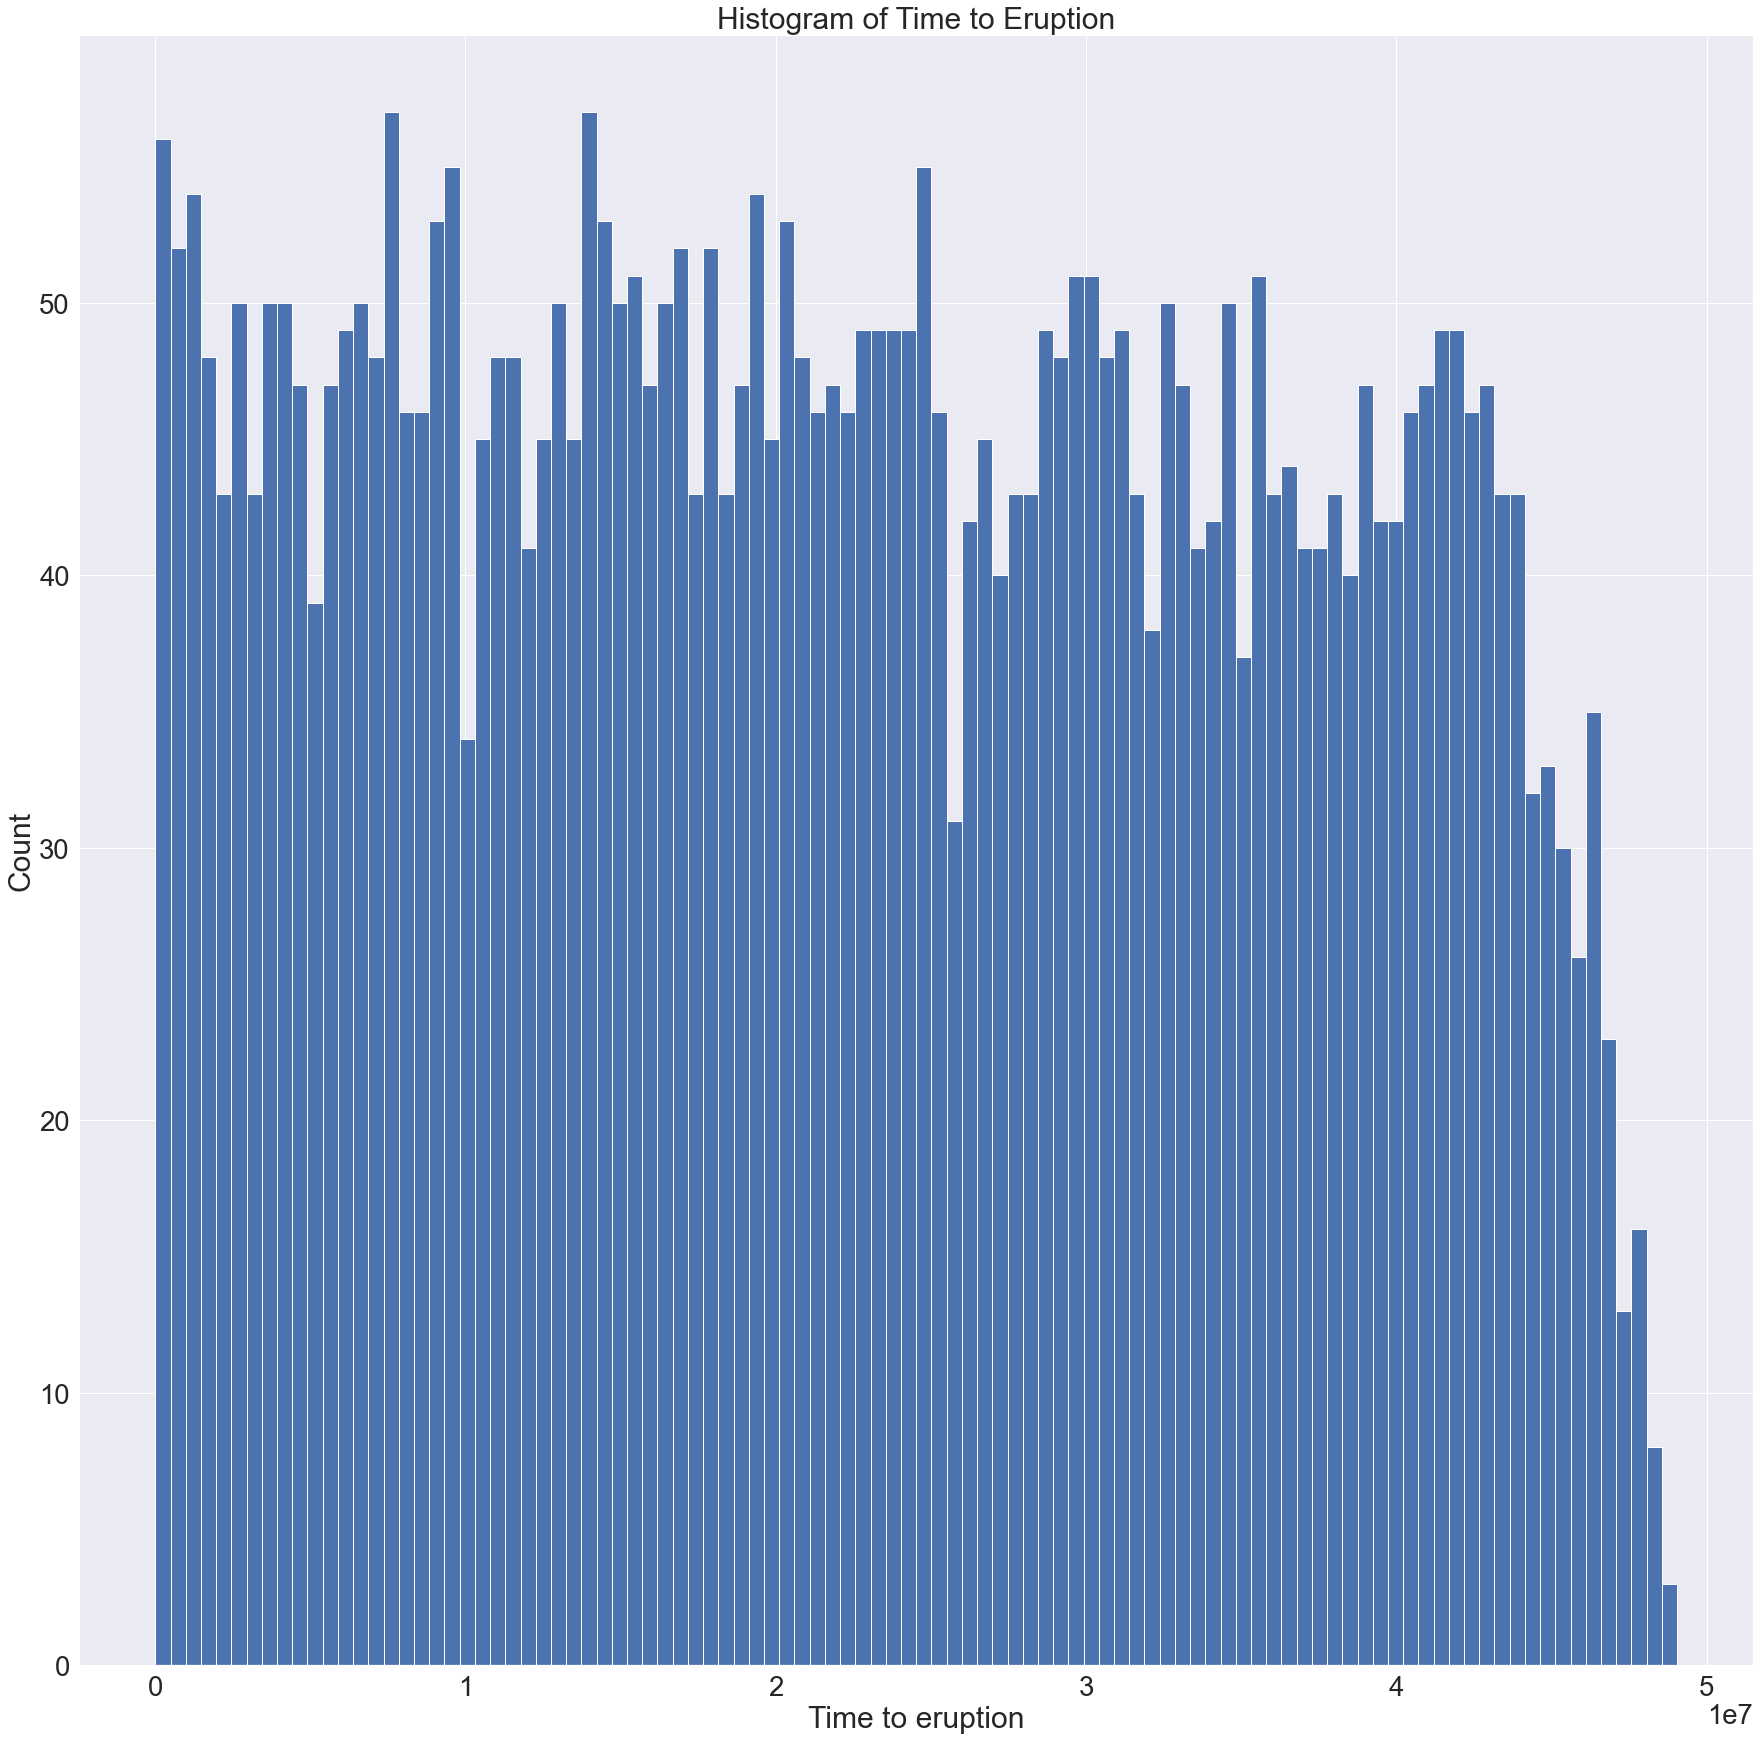

In [61]:
plt.figure(figsize=(30, 30))

plt.xlabel('Time to eruption')
plt.ylabel('Count')
plt.title('Histogram of Time to Eruption')

plt.hist(df['time_to_eruption'],bins=100)
plt.show()

We notice a steep drop near the tail of the histogram, as values get far more extreme they start to appear less frequently. There are some dips elsewhere but it seems the data is fairly spread out.

## 3.9 Conclusion

Our data contains about 240 features which makes it hard to visualize. In an attempt to do so, I perform a PCA transformation to reduce the number of components to 25. 25 components explains about 90% of the variability in our data so increasing the component size would bring diminishing returns. Nothing was noticed in the PCA data other than the odd behavior of the points being focused on a vertical line, with some spread. We also look at some heatmaps just to see if the compnents have a linear relation with our target data, as well as the local extrema features. No strong linear relations were noticed. To try different dimmensionality reduction, I used t-SNE to see if some patterns could be noticed. Coloring the graph by the target values shows clusters of similar colored points which could lead to something and be interesting to delve deeper into. I also applied a DBSCAN cluster just to see how it would cluster things outside of the obvious clusters that appear in the transformation. Lastly, I take a lok at a histogram of the target values and the only thing of interest is the step declien at the extreme values on the end. Other than that, nothing has been noticed within our created features and dimmension reduced data.